In [202]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [203]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [204]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [206]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [207]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with = engine)
Base.classes.keys()

['station', 'measurement']

In [208]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [209]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
measurement = Base.classes.measurement
station = Base.classes.station

In [210]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [211]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
print (most_recent_date)

2017-08-23


2017-08-23


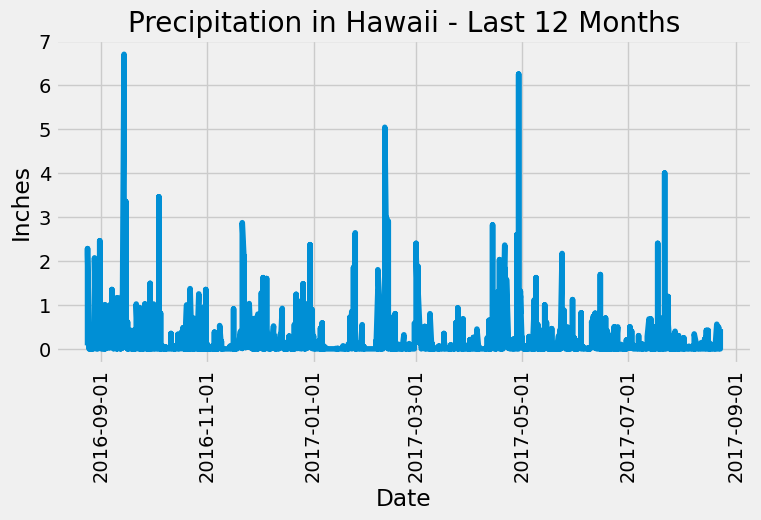

In [212]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date = session.query(func.max(measurement.date)).scalar()
print (most_recent_date)

# Calculate the date one year from the last date in data set.
most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d")
one_year_ago = most_recent_date - timedelta(days=365)
one_year_ago_str = one_year_ago.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
precipitation_data = (
    session.query(measurement.date, measurement.prcp)
    .filter(measurement.date >= one_year_ago)
    .all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns = ["date", "precipitation"])
precipitation_df = precipitation_df.dropna()
precipitation_df = precipitation_df.sort_values("date")

# Sort the dataframe by date
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (8, 4))
plt.plot(precipitation_df["date"], precipitation_df["precipitation"])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=90)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation in Hawaii - Last 12 Months")
plt.xticks(rotation = 90)
plt.grid(True)

plt.show()

In [213]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(precipitation_df.describe())

                                date  precipitation
count                           2015    2015.000000
mean   2017-02-16 21:35:38.560794368       0.176462
min              2016-08-24 00:00:00       0.000000
25%              2016-11-18 00:00:00       0.000000
50%              2017-02-15 00:00:00       0.020000
75%              2017-05-17 00:00:00       0.130000
max              2017-08-23 00:00:00       6.700000
std                              NaN       0.460288


# Exploratory Station Analysis

In [214]:
# Design a query to calculate the total number of stations in the dataset
total_number_of_stations = session.query(station).count()
total_number_of_stations

9

In [215]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = (
    session.query(measurement.station, func.count(measurement.station))
    .group_by(measurement.station).order_by(func.count(measurement.station).desc())
    .all()
)
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [216]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

temp_stats = (
    session.query(
        func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)
    )
    .filter(measurement.station == most_active_station)
    .all()
)

temp_stats


[(54.0, 85.0, 71.66378066378067)]

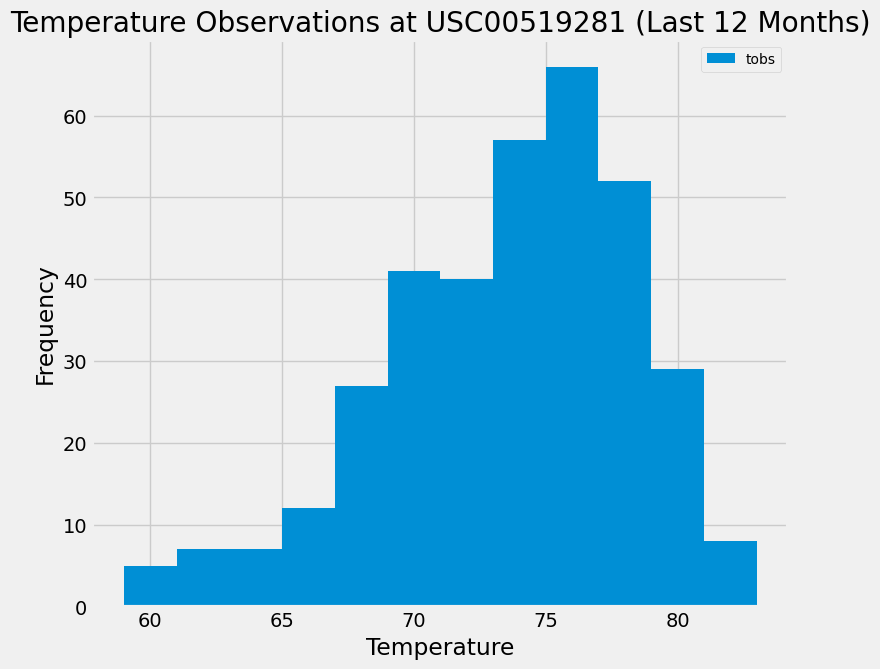

In [217]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = most_active_stations[0][0]
temps = (
    session.query(measurement.tobs)
    .filter(measurement.station == most_active_station)
    .filter(measurement.date >= one_year_ago)
    .all()
)
temps = [temp[0] for temp in temps]


plt.figure(figsize=(8, 7))
plt.hist(temps, bins=12,)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations at {most_active_station} (Last 12 Months)")
plt.legend(["tobs"], loc='upper right', fontsize=10)

# Show plot
plt.show()

# Close Session

In [218]:
# Close Session
session.close()
